# Apple Interview Questions
* Leetcode (numbered)
* Maybe others

In [3]:
from typing import List

# These Apple questions can be found in other companies' notebooks

### Arrays and Strings
```
1. Two Sum (Editor's choice: Frequently asked by Apple) (A)
3. Longest Substring Without Repeating Characters (F)
8. String to Integer (atoi) (A)
12. Integer to Roman (A)
13. Roman to Integer (F)
15. 3Sum (Editor's choice: Frequently asked by Apple) (F)
16. 3Sum Closest (A)
49. Group Anagrams (F)
76. Minimum Window Substring (F)
125. Valid Palindrome (F)
238. Product of Array Except Self (F)
268. Missing Number (A)
387. First Unique Character in a String (A)
560. Subarray Sum Equals K (F)
977. Squares of a Sorted Array (F)
20. Valid Parentheses (notebook for strings)
42. Trapping Rain Water (Editor's choice: frequently asked by Apple) (G)
```
### Linked Lists
```
2. Add Two Numbers (Editor's choice: frequently asked by Apple) (F)
21. Merge Two Sorted Lists (Editor's choice: frequently asked by Apple) (F)
206. Reverse Linked List (A)
```
### Trees and Graphs
```
133. Clone Graph (F)
200. Number of Islands (F)
236. Lowest Common Ancestor of a Binary Tree (F)
329. Longest Increasing Path in a Matrix (G)
543. Diameter of Binary Tree (F)
```
### Recursion
```
17. Letter Combinations of a Phone Number (G)
22. Generate Parentheses (G)
46. Permutations (F)
78. Subsets (F)
79. Word Search (A)
```
### Sorting and Searching
```
4. Median of Two Sorted Arrays (no official solution) (G)
33. Search in Rotated Sorted Array (F)
56. Merge Intervals (Editor's choice: frequently asked by Apple) (G)
242. Valid Anagram (strings notebook)
349. Intersection of Two Arrays (Editor's choice: frequently asked by Apple) (F)
350. Intersection of Two Arrays II (F)
973. K Closest Points to Origin (G)
```
### Dynamic Programming
```
5. Longest Palindromic Substring (G)
10. Regular Expression Matching (F)
53. Maximum Subarray (Editor's choice: frequently asked by Apple) (G)
121. Best Time to Buy and Sell Stock (Editor's choice: frequently asked by Apple) (G)
139. Word Break (F)
```
### Design
```
146. LRU Cache (Editor's choice: frequently asked by Apple) (G)
155. Min Stack (G)
380. Insert Delete GetRandom O(1) (G)
```
### Other
```
7. Reverse Integer (G)
771. Jewels and Stones (G)
```

# Arrays and Strings
Apple likes to ask simple, basic array questions. We highly recommend you practice Two Sum and its variance, 3Sum

## 18. 4Sum
Given an array nums of n integers, return an array of all the unique quadruplets [nums[a], nums[b], nums[c], nums[d]] such that:

0 <= a, b, c, d < n  
a, b, c, and d are distinct.  
nums[a] + nums[b] + nums[c] + nums[d] == target  
You may return the answer in any order.

Example 1:  
Input: nums = [1,0,-1,0,-2,2], target = 0  
Output: [[-2,-1,1,2],[-2,0,0,2],[-1,0,0,1]]  

Example 2:  
Input: nums = [2,2,2,2,2], target = 8  
Output: [[2,2,2,2]]

Constraints:

1 <= nums.length <= 200  
-10^9 <= nums[i] <= 10^9  
-10^9 <= target <= 10^9

In [4]:
# recursive ksum (any k)
# time = O(n^(k−1)), or O(n^3) for 4Sum, space = O(n)
class Solution:
    def fourSum(self, nums: List[int], target: int) -> List[List[int]]:

        def kSum(nums: List[int], target: int, k: int) -> List[List[int]]:
            res = []
            
            # If we have run out of numbers to add, return res.
            if not nums:
                return res
            
            # There are k remaining values to add to the sum. The 
            # average of these values is at least target // k.
            average_value = target // k
            
            # We cannot obtain a sum of target if the smallest value
            # in nums is greater than target // k or if the largest 
            # value in nums is smaller than target // k.
            if average_value < nums[0] or nums[-1] < average_value:
                return res
            
            if k == 2:
                return twoSum(nums, target)
    
            for i in range(len(nums)):
                if i == 0 or nums[i - 1] != nums[i]:
                    for subset in kSum(nums[i + 1:], target - nums[i], k - 1):
                        res.append([nums[i]] + subset)
    
            return res

        def twoSum(nums: List[int], target: int) -> List[List[int]]:
            res = []
            lo, hi = 0, len(nums) - 1
    
            while (lo < hi):
                curr_sum = nums[lo] + nums[hi]
                if curr_sum < target or (lo > 0 and nums[lo] == nums[lo - 1]):
                    lo += 1
                elif curr_sum > target or (hi < len(nums) - 1 and nums[hi] == nums[hi + 1]):
                    hi -= 1
                else:
                    res.append([nums[lo], nums[hi]])
                    lo += 1
                    hi -= 1
                                                         
            return res

        nums.sort()
        return kSum(nums, target, 4)

In [ ]:
# hash set
# time = O(n^(k−1)), or O(n^3) for 4Sum, space = O(n)
class Solution:
    def fourSum(self, nums: List[int], target: int) -> List[List[int]]:

        def kSum(nums: List[int], target: int, k: int) -> List[List[int]]:
            res = []
            
            # If we have run out of numbers to add, return res.
            if not nums:
                return res
            
            # There are k remaining values to add to the sum. The 
            # average of these values is at least target // k.
            average_value = target // k
            
            # We cannot obtain a sum of target if the smallest value
            # in nums is greater than target // k or if the largest 
            # value in nums is smaller than target // k.
            if average_value < nums[0] or nums[-1] < average_value:
                return res
            
            if k == 2:
                return twoSum(nums, target)
    
            for i in range(len(nums)):
                if i == 0 or nums[i - 1] != nums[i]:
                    for subset in kSum(nums[i + 1:], target - nums[i], k - 1):
                        res.append([nums[i]] + subset)
    
            return res

        def twoSum(nums: List[int], target: int) -> List[List[int]]:
            res = []
            s = set()
    
            for i in range(len(nums)):
                if len(res) == 0 or res[-1][1] != nums[i]:
                    if target - nums[i] in s:
                        res.append([target - nums[i], nums[i]])
                s.add(nums[i])
    
            return res

        nums.sort()
        return kSum(nums, target, 4)

## 54. Spiral Matrix
Given an m x n matrix, return all elements of the matrix in spiral order.

Example 1:
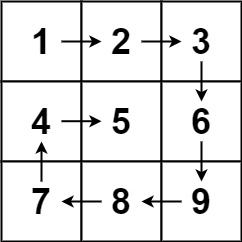
Input: matrix = [[1,2,3],[4,5,6],[7,8,9]]
Output: [1,2,3,6,9,8,7,4,5]

Example 2:
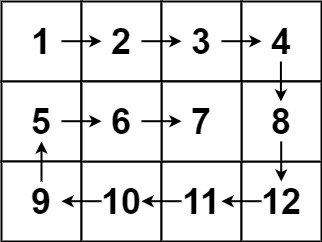
Input: matrix = [[1,2,3,4],[5,6,7,8],[9,10,11,12]]
Output: [1,2,3,4,8,12,11,10,9,5,6,7]

Constraints:

m == matrix.length
n == matrix[i].length
1 <= m, n <= 10
-100 <= matrix[i][j] <= 100


   Hint #1  
Well for some problems, the best way really is to come up with some algorithms for simulation. Basically, you need to simulate what the problem asks us to do.  
   Hint #2  
We go boundary by boundary and move inwards. That is the essential operation. First row, last column, last row, first column, and then we move inwards by 1 and repeat. That's all. That is all the simulation that we need.  
   Hint #3  
Think about when you want to switch the progress on one of the indexes. If you progress on i out of [i, j], you'll shift in the same column. Similarly, by changing values for j, you'd be shifting in the same row. Also, keep track of the end of a boundary so that you can move inwards and then keep repeating. It's always best to simulate edge cases like a single column or a single row to see if anything breaks or not.


In [ ]:
# set up boundaries
# time = O(MN), space = O(1)
class Solution:
    def spiralOrder(self, matrix: List[List[int]]) -> List[int]:
        result = []
        rows, columns = len(matrix), len(matrix[0])
        up = left = 0
        right = columns - 1
        down = rows - 1

        while len(result) < rows * columns:
            # Traverse from left to right.
            for col in range(left, right + 1):
                result.append(matrix[up][col])

            # Traverse downwards.
            for row in range(up + 1, down + 1):
                result.append(matrix[row][right])

            # Make sure we are now on a different row.
            if up != down:
                # Traverse from right to left.
                for col in range(right - 1, left - 1, -1):
                    result.append(matrix[down][col])

            # Make sure we are now on a different column.
            if left != right:
                # Traverse upwards.
                for row in range(down - 1, up, -1):
                    result.append(matrix[row][left])

            left += 1
            right -= 1
            up += 1
            down -= 1

        return result

In [ ]:
# mark visited elements
# time = O(MN), space = O(1)
class Solution:
    def spiralOrder(self, matrix: List[List[int]]) -> List[int]:
        VISITED = 101
        rows, columns = len(matrix), len(matrix[0])
        # Four directions that we will move: right, down, left, up.
        directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
        # Initial direction: moving right.
        current_direction = 0
        # The number of times we change the direction.
        change_direction = 0
        # Current place that we are at is (row, col).
        # row is the row index; col is the column index.
        row = col = 0
        # Store the first element and mark it as visited.
        result = [matrix[0][0]]
        matrix[0][0] = VISITED

        while change_direction < 2:

            while True:
                # Calculate the next place that we will move to.
                next_row = row + directions[current_direction][0]
                next_col = col + directions[current_direction][1]

                # Break if the next step is out of bounds.
                if not (0 <= next_row < rows and 0 <= next_col < columns):
                    break
                # Break if the next step is on a visited cell.
                if matrix[next_row][next_col] == VISITED:
                    break

                # Reset this to 0 since we did not break and change the direction.
                change_direction = 0
                # Update our current position to the next step.
                row, col = next_row, next_col
                result.append(matrix[row][col])
                matrix[row][col] = VISITED

            # Change our direction.
            current_direction = (current_direction + 1) % 4
            # Increment change_direction because we changed our direction.
            change_direction += 1

        return result

## 229. Majority Element II
Given an integer array of size n, find all elements that appear more than ⌊ n/3 ⌋ times.

Example 1:
Input: nums = [3,2,3]
Output: [3]

Example 2:
Input: nums = [1]
Output: [1]

Example 3:
Input: nums = [1,2]
Output: [1,2]

Constraints:

1 <= nums.length <= 5 * 10^4
-10^9 <= nums[i] <= 10^9
 

Follow up: Could you solve the problem in linear time and in O(1) space?

   Hint #1  
How many majority elements could it possibly have?

In [ ]:
# Boyer-Moore Voting Algorithm
# time = O(n), space = O(1)
class Solution:

    def majorityElement(self, nums):
        if not nums:
            return []
        
        # 1st pass
        count1, count2, candidate1, candidate2 = 0, 0, None, None
        for n in nums:
            if candidate1 == n:
                count1 += 1
            elif candidate2 == n:
                count2 += 1
            elif count1 == 0:
                candidate1 = n
                count1 += 1
            elif count2 == 0:
                candidate2 = n
                count2 += 1
            else:
                count1 -= 1
                count2 -= 1
        
        # 2nd pass
        result = []
        for c in [candidate1, candidate2]:
            if nums.count(c) > len(nums)//3:
                result.append(c)

        return result

## 311. Sparse Matrix Multiplication
Given two sparse matrices mat1 of size m x k and mat2 of size k x n, return the result of mat1 x mat2. You may assume that multiplication is always possible.

Example 1:
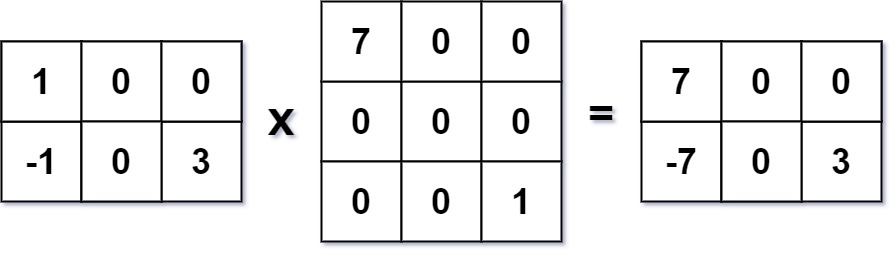
Input: mat1 = [[1,0,0],[-1,0,3]], mat2 = [[7,0,0],[0,0,0],[0,0,1]]
Output: [[7,0,0],[-7,0,3]]

Example 2:

Input: mat1 = [[0]], mat2 = [[0]]
Output: [[0]]

Constraints:

m == mat1.length
k == mat1[i].length == mat2.length
n == mat2[i].length
1 <= m, n, k <= 100
-100 <= mat1[i][j], mat2[i][j] <= 100

__Yale Matrix Compression__
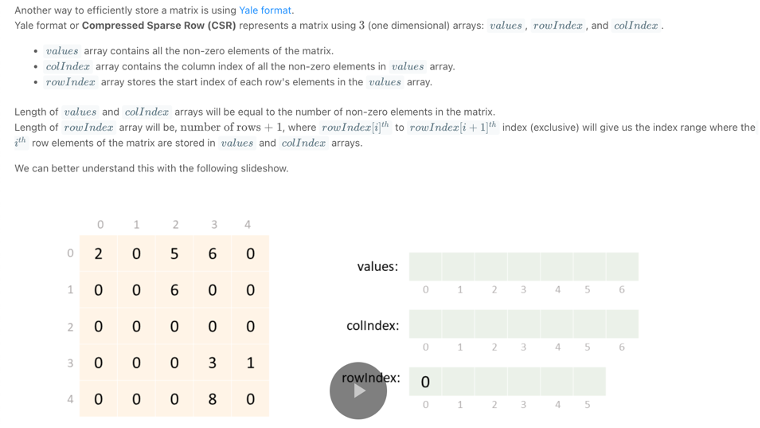

__Algo__
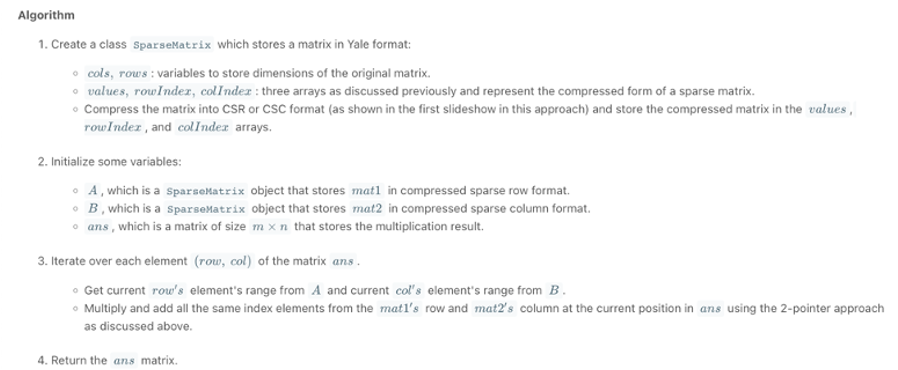

In [ ]:
# Yale format
# time = O(m⋅n⋅k) where mat1.shape=[m,n], mat2.shape=[n,k]; space = O(m⋅k+k⋅n)
class SparseMatrix:
    def __init__(self, matrix: List[List[int]], col_wise: bool):
        self.values, self.row_index, self.col_index = self.compress_matrix(matrix, col_wise)

    def compress_matrix(self, matrix: List[List[int]], col_wise: bool):
        return self.compress_col_wise(matrix) if col_wise else self.compress_row_wise(matrix)

    # Compressed Sparse Row
    def compress_row_wise(self, matrix: List[List[int]]):
        values = []
        row_index = [0]
        col_index = []

        for row in range(len(matrix)):
            for col in range(len(matrix[0])):
                if matrix[row][col]:
                    values.append(matrix[row][col])
                    col_index.append(col)
            row_index.append(len(values))

        return values, row_index, col_index

    # Compressed Sparse Column
    def compress_col_wise(self, matrix: List[List[int]]):
        values = []
        row_index = []
        col_index = [0]

        for col in range(len(matrix[0])):
            for row in range(len(matrix)):
                if matrix[row][col]:
                    values.append(matrix[row][col])
                    row_index.append(row)
            col_index.append(len(values))

        return values, row_index, col_index

class Solution:
    def multiply(self, mat1: List[List[int]], mat2: List[List[int]]) -> List[List[int]]:
            A = SparseMatrix(mat1, False)
            B = SparseMatrix(mat2, True)
            
            ans = [[0] * len(mat2[0]) for _ in range(len(mat1))]

            for row in range(len(ans)):
                for col in range(len(ans[0])):

                    # Row element range indices
                    mat1_row_start = A.row_index[row]
                    mat1_row_end = A.row_index[row + 1]

                    # Column element range indices
                    mat2_col_start = B.col_index[col]
                    mat2_col_end = B.col_index[col + 1]
                    
                    # Iterate over both row and column.
                    while mat1_row_start < mat1_row_end and mat2_col_start < mat2_col_end:
                        if A.col_index[mat1_row_start] < B.row_index[mat2_col_start]:
                            mat1_row_start += 1
                        elif A.col_index[mat1_row_start] > B.row_index[mat2_col_start]:
                            mat2_col_start += 1
                        # Row index and col index are same so we can multiply these elements.
                        else:
                            ans[row][col] += A.values[mat1_row_start] * B.values[mat2_col_start]
                            mat1_row_start += 1
                            mat2_col_start += 1
    
            return ans

In [ ]:
# list of lists
# time = O(m⋅n⋅k) where mat1.shape=[m,n], mat2.shape=[n,k]; space = O(m⋅k+k⋅n)
class Solution:
    def multiply(self, mat1: List[List[int]], mat2: List[List[int]]) -> List[List[int]]:
        def compress_matrix(matrix: List[List[int]]) -> List[List[int]]:
            rows, cols = len(matrix), len(matrix[0])
            compressed_matrix = [[] for _ in range(rows)]
            for row in range(rows):
                for col in range(cols):
                    if matrix[row][col]:
                        compressed_matrix[row].append([matrix[row][col], col])
            return compressed_matrix
        
        m = len(mat1)
        k = len(mat1[0])
        n = len(mat2[0])
        
        # Store the non-zero values of each matrix.
        A = compress_matrix(mat1)
        B = compress_matrix(mat2)
        
        ans = [[0] * n for _ in range(m)]
        
        for mat1_row in range(m):
            # Iterate on all current 'row' non-zero elements of mat1.
            for element1, mat1_col in A[mat1_row]:
                # Multiply and add all non-zero elements of mat2
                # where the row is equal to col of current element of mat1.
                for element2, mat2_col in B[mat1_col]:
                    ans[mat1_row][mat2_col] += element1 * element2
                    
        return ans

In [ ]:
# naive
# time = O(m⋅n⋅k) where mat1.shape=[m,n], mat2.shape=[n,k]; space = O(1)
class Solution:
    def multiply(self, mat1: List[List[int]], mat2: List[List[int]]) -> List[List[int]]:
        
        # Product matrix.
        ans = [[0] * len(mat2[0]) for _ in range(len(mat1))]
        
        for row_index, row_elements in enumerate(mat1):
            for element_index, row_element in enumerate(row_elements):
                # If current element of mat1 is non-zero then iterate over all columns of mat2.
                if row_element:
                    for col_index, col_element in enumerate(mat2[element_index]):
                        ans[row_index][col_index] += row_element * col_element
        
        return ans

# Linked Lists
These are some of the most important linked list questions asked by Apple. We recommend you practice all of these questions. One of the classics is Reverse Linked List. See all three questions in the above list of questions listed in other companies' notebooks

# Trees and Graphs
Apple likes to ask questions related to the Tree data structure. Even though graph-like questions are not frequently asked, definitely brush up on your graph fundamentals -- the "Clone Graph" problem is common in Apple interviews

## 100. Same Tree
Given the roots of two binary trees p and q, write a function to check if they are the same or not. Two binary trees are considered the same if they are structurally identical, and the nodes have the same value.

Example 1:
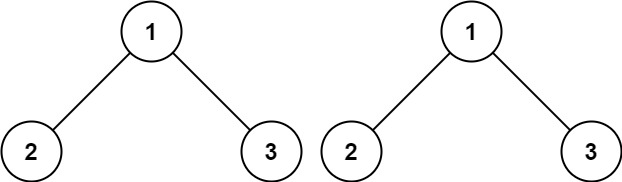
Input: p = [1,2,3], q = [1,2,3]
Output: true

Example 2:
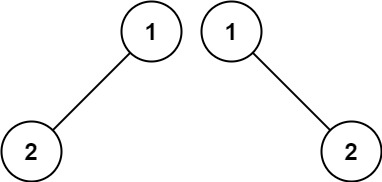
Input: p = [1,2], q = [1,null,2]
Output: false

Example 3:
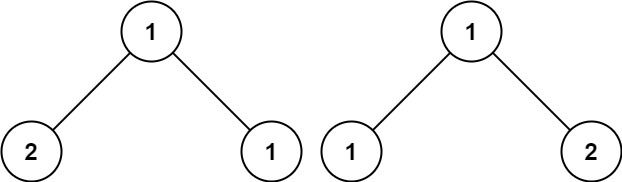
Input: p = [1,2,1], q = [1,1,2]
Output: false

Constraints:

The number of nodes in both trees is in the range [0, 100].
-10^4 <= Node.val <= 10^4

In [ ]:
# recursive
# time = space = O(n)
# Definition for a binary tree node.
# class TreeNode(object):
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def isSameTree(self, p, q):
        """
        :type p: TreeNode
        :type q: TreeNode
        :rtype: bool
        """    
        # p and q are both None
        if not p and not q:
            return True
        # one of p and q is None
        if not q or not p:
            return False
        if p.val != q.val:
            return False
        return self.isSameTree(p.right, q.right) and \
               self.isSameTree(p.left, q.left)

In [ ]:
# iterative
# time = space = O(n)
from collections import deque
class Solution:
    def isSameTree(self, p, q):
        """
        :type p: TreeNode
        :type q: TreeNode
        :rtype: bool
        """    
        def check(p, q):
            # if both are None
            if not p and not q:
                return True
            # one of p and q is None
            if not q or not p:
                return False
            if p.val != q.val:
                return False
            return True
        
        deq = deque([(p, q),])
        while deq:
            p, q = deq.popleft()
            if not check(p, q):
                return False
            
            if p:
                deq.append((p.left, q.left))
                deq.append((p.right, q.right))
                    
        return True

## 104. Maximum Depth of Binary Tree
Given the root of a binary tree, return its maximum depth. A binary tree's maximum depth is the number of nodes along the longest path from the root node down to the farthest leaf node.

Example 1:
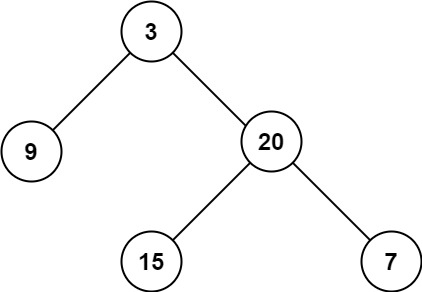
Input: root = [3,9,20,null,null,15,7]
Output: 3

Example 2:
Input: root = [1,null,2]
Output: 2

Constraints:

The number of nodes in the tree is in the range [0, 10^4].
-100 <= Node.val <= 100

In [ ]:
# recursive
# time = space = O(n) (space = O(logn) if tree is balanced => h = logn)
# Definition for a binary tree node.
# class TreeNode(object):
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def maxDepth(self, root):
        """
        :type root: TreeNode
        :rtype: int
        """ 
        if root is None: 
            return 0 
        else: 
            left_height = self.maxDepth(root.left) 
            right_height = self.maxDepth(root.right) 
            return max(left_height, right_height) + 1 

In [ ]:
# iterative
# time = space = O(n) (space = O(logn) if tree is balanced => h = logn)
class Solution:
    def maxDepth(self, root):
        """
        :type root: TreeNode
        :rtype: int
        """ 
        stack = []
        if root is not None:
            stack.append((1, root))
        
        depth = 0
        while stack != []:
            current_depth, root = stack.pop()
            if root is not None:
                depth = max(depth, current_depth)
                stack.append((current_depth + 1, root.left))
                stack.append((current_depth + 1, root.right))
        
        return depth

# Recursion
We recommend you complete all of these questions. These are some basic recursion questions asked by Apple. Practicing these problems will help you prepare for other interviews as well. One here + see other questions in the above list of questions listed in other companies' notebooks

## 39. Combination Sum
Given an array of distinct integers candidates and a target integer target, return a list of all unique combinations of candidates where the chosen numbers sum to target. You may return the combinations in any order.

The same number may be chosen from candidates an unlimited number of times. Two combinations are unique if the frequency of at least one of the chosen numbers is different.

The test cases are generated such that the number of unique combinations that sum up to target is less than 150 combinations for the given input.

Example 1:
Input: candidates = [2,3,6,7], target = 7
Output: [[2,2,3],[7]]
Explanation:
2 and 3 are candidates, and 2 + 2 + 3 = 7. Note that 2 can be used multiple times.
7 is a candidate, and 7 = 7.
These are the only two combinations.

Example 2:
Input: candidates = [2,3,5], target = 8
Output: [[2,2,2,2],[2,3,3],[3,5]]
Example 3:
Input: candidates = [2], target = 1
Output: []

Constraints:

1 <= candidates.length <= 30
2 <= candidates[i] <= 40
All elements of candidates are distinct.
1 <= target <= 40

In [ ]:
# backtracking
# time = O(N^((T/M)+1), space = O(T/M)
class Solution:
    def combinationSum(self, candidates: List[int], target: int) -> List[List[int]]:

        results = []

        def backtrack(remain, comb, start):
            if remain == 0:
                # make a deep copy of the current combination
                results.append(list(comb))
                return
            elif remain < 0:
                # exceed the scope, stop exploration.
                return

            for i in range(start, len(candidates)):
                # add the number into the combination
                comb.append(candidates[i])
                # give the current number another chance, rather than moving on
                backtrack(remain - candidates[i], comb, i)
                # backtrack, remove the number from the combination
                comb.pop()

        backtrack(target, [], 0)

        return results

# Sorting and Searching
We highly recommend practicing the Intersection of Two Arrays problem, which is frequently asked in Apple's phone interview. See all questions from this section in the above list of questions from other companies' notebooks

## 75. Sort Colors
Given an array nums with n objects colored red, white, or blue, sort them in-place so that objects of the same color are adjacent, with the colors in the order red, white, and blue.

We will use the integers 0, 1, and 2 to represent the color red, white, and blue, respectively.

You must solve this problem without using the library's sort function.

Example 1:
Input: nums = [2,0,2,1,1,0]
Output: [0,0,1,1,2,2]

Example 2:
Input: nums = [2,0,1]
Output: [0,1,2]

Constraints:

n == nums.length
1 <= n <= 300
nums[i] is either 0, 1, or 2.

Follow up: Could you come up with a one-pass algorithm using only constant extra space?

   Hide Hint #1  
A rather straight forward solution is a two-pass algorithm using counting sort.
   Hide Hint #2  
Iterate the array counting number of 0's, 1's, and 2's.
   Hide Hint #3  
Overwrite array with the total number of 0's, then 1's and followed by 2's.

In [ ]:
# time = O(N), space = O(1)
class Solution:
    def sortColors(self, nums: List[int]) -> None:
        """
        Dutch National Flag problem solution.
        """
        # for all idx < p0 : nums[idx < p0] = 0
        # curr is an index of element under consideration
        p0 = curr = 0
        # for all idx > p2 : nums[idx > p2] = 2
        p2 = len(nums) - 1

        while curr <= p2:
            if nums[curr] == 0:
                nums[p0], nums[curr] = nums[curr], nums[p0]
                p0 += 1
                curr += 1
            elif nums[curr] == 2:
                nums[curr], nums[p2] = nums[p2], nums[curr]
                p2 -= 1
            else:
                curr += 1

## 692. Top K Frequent Words
Given an array of strings words and an integer k, return the k most frequent strings. Return the answer sorted by the frequency from highest to lowest. Sort the words with the same frequency by their lexicographical order.

Example 1:
Input: words = ["i","love","leetcode","i","love","coding"], k = 2
Output: ["i","love"]
Explanation: "i" and "love" are the two most frequent words.
Note that "i" comes before "love" due to a lower alphabetical order.

Example 2:
Input: words = ["the","day","is","sunny","the","the","the","sunny","is","is"], k = 4
Output: ["the","is","sunny","day"]
Explanation: "the", "is", "sunny" and "day" are the four most frequent words, with the number of occurrence being 4, 3, 2 and 1 respectively.

Constraints:

1 <= words.length <= 500
1 <= words[i].length <= 10
words[i] consists of lowercase English letters.
k is in the range [1, The number of unique words[i]]

Follow-up: Could you solve it in O(n log(k)) time and O(n) extra space?

In [ ]:
# min heap
# time = O(Nlogk), space = O(N) where N = len(words)
from collections import Counter
from heapq import heappush, heappop


class Pair:
    def __init__(self, word, freq):
        self.word = word
        self.freq = freq

    def __lt__(self, p):
        return self.freq < p.freq or (self.freq == p.freq and self.word > p.word)


class Solution:
    def topKFrequent(self, words: List[str], k: int) -> List[str]:
        cnt = Counter(words)
        h = []
        for word, freq in cnt.items():
            heappush(h, Pair(word, freq))
            if len(h) > k:
                heappop(h)
        return [p.word for p in sorted(h, reverse=True)]

In [ ]:
# max heap
# time = O(N+klogN), space = O(N) where N = len(words)
from collections import Counter
from heapq import nsmallest

class Solution:
    def topKFrequent(self, words: List[str], k: int) -> List[str]:
        cnt = Counter(words)
        return nsmallest(k, cnt.keys(), key=lambda x: (-cnt[x], x))

# Dynamic Programming
Apple does not ask a whole lot of Dynamic Programming questions. We recommend practicing the Best Time to Buy, the Sell Stock, and the Maximum Subarray problems. See all questions from this section in the above list of questions from other companies' notebooks

# Design
These are some design questions for you to practice for your Apple interview. We highly recommend the LRU Cache problem. See all questions from this section in the above list of questions from other companies' notebooks

## 341. Flatten Nested List Iterator
You are given a nested list of integers nestedList. Each element is either an integer or a list whose elements may also be integers or other lists. Implement an iterator to flatten it.

Implement the NestedIterator class:

NestedIterator(List<NestedInteger> nestedList) Initializes the iterator with the nested list nestedList.
int next() Returns the next integer in the nested list.
boolean hasNext() Returns true if there are still some integers in the nested list and false otherwise.
Your code will be tested with the following pseudocode:

initialize iterator with nestedList
res = []
while iterator.hasNext()
    append iterator.next() to the end of res
return res
If res matches the expected flattened list, then your code will be judged as correct.

Example 1:
Input: nestedList = [[1,1],2,[1,1]]
Output: [1,1,2,1,1]
Explanation: By calling next repeatedly until hasNext returns false, the order of elements returned by next should be: [1,1,2,1,1].

Example 2:
Input: nestedList = [1,[4,[6]]]
Output: [1,4,6]
Explanation: By calling next repeatedly until hasNext returns false, the order of elements returned by next should be: [1,4,6].

Constraints:

1 <= nestedList.length <= 500
The values of the integers in the nested list is in the range [-10^6, 10^6].

In [ ]:
# Two stacks
# time - Constructor: O(1), makeStackTopAnInteger() / next() / hasNext(): O(L/N) or O(1); space = O(D)
# where N = # integers in nested list, L = total # lists in nested list, and D = max nesting depth 
class NestedIterator:
    
    def __init__(self, nestedList: [NestedInteger]):
        self.stack = [[nestedList, 0]]
        
    def make_stack_top_an_integer(self):
        
        while self.stack:
            
            # Essential for readability :)
            current_list = self.stack[-1][0]
            current_index = self.stack[-1][1]
            
            # If the top list is used up, pop it and its index.
            if len(current_list) == current_index:
                self.stack.pop()
                continue
            
            # Otherwise, if it's already an integer, we don't need 
            # to do anything.
            if current_list[current_index].isInteger():
                break
            
            # Otherwise, it must be a list. We need to increment the index
            # on the previous list, and add the new list.
            new_list = current_list[current_index].getList()
            self.stack[-1][1] += 1 # Increment old.
            self.stack.append([new_list, 0])
            
    
    def next(self) -> int:
        self.make_stack_top_an_integer()
        current_list = self.stack[-1][0]
        current_index = self.stack[-1][1]
        self.stack[-1][1] += 1
        return current_list[current_index].getInteger()
        
    
    def hasNext(self) -> bool:
        self.make_stack_top_an_integer()
        return len(self.stack) > 0

In [ ]:
# Using generators
# time - Constructor: O(1), next() / hasNext(): O(L/N) or O(1); space = O(D)
class NestedIterator:

    def __init__(self, nestedList: [NestedInteger]):
        # Get a generator object from the generator function, passing in
        # nestedList as the parameter.
        self._generator = self._int_generator(nestedList)
        # All values are placed here before being returned.
        self._peeked = None

    # This is the generator function. It can be used to create generator
    # objects.
    def _int_generator(self, nested_list) -> "Generator[int]":
        # This code is the same as Approach 1. It's a recursive DFS.
        for nested in nested_list:
            if nested.isInteger():
                yield nested.getInteger()
            else:
                # We always use "yield from" on recursive generator calls.
                yield from self._int_generator(nested.getList())
        # Will automatically raise a StopIteration.
    
    def next(self) -> int:
        # Check there are integers left, and if so, then this will
        # also put one into self._peeked.
        if not self.hasNext(): return None
        # Return the value of self._peeked, also clearing it.
        next_integer, self._peeked = self._peeked, None
        return next_integer
        
    def hasNext(self) -> bool:
        if self._peeked is not None: return True
        try: # Get another integer out of the generator.
            self._peeked = next(self._generator)
            return True
        except: # The generator is finished so raised StopIteration.
            return False

# Other
Here are some other questions for you to practice for your Apple interview. These are usually related to Math problems. We also added a database question (Combine Two Tables) which may be applicable, depending on the position you're applying for

## 36. Valid Sudoku
Determine if a 9 x 9 Sudoku board is valid. Only the filled cells need to be validated according to the following rules:

Each row must contain the digits 1-9 without repetition.
Each column must contain the digits 1-9 without repetition.
Each of the nine 3 x 3 sub-boxes of the grid must contain the digits 1-9 without repetition.
Note:

A Sudoku board (partially filled) could be valid but is not necessarily solvable.
Only the filled cells need to be validated according to the mentioned rules.
 

Example 1:
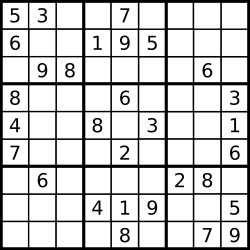
```
Input: board = 
[["5","3",".",".","7",".",".",".","."]
,["6",".",".","1","9","5",".",".","."]
,[".","9","8",".",".",".",".","6","."]
,["8",".",".",".","6",".",".",".","3"]
,["4",".",".","8",".","3",".",".","1"]
,["7",".",".",".","2",".",".",".","6"]
,[".","6",".",".",".",".","2","8","."]
,[".",".",".","4","1","9",".",".","5"]
,[".",".",".",".","8",".",".","7","9"]]
```
Output: true
Example 2:
```
Input: board = 
[["8","3",".",".","7",".",".",".","."]
,["6",".",".","1","9","5",".",".","."]
,[".","9","8",".",".",".",".","6","."]
,["8",".",".",".","6",".",".",".","3"]
,["4",".",".","8",".","3",".",".","1"]
,["7",".",".",".","2",".",".",".","6"]
,[".","6",".",".",".",".","2","8","."]
,[".",".",".","4","1","9",".",".","5"]
,[".",".",".",".","8",".",".","7","9"]]
```
Output: false
Explanation: Same as Example 1, except with the 5 in the top left corner being modified to 8. Since there are two 8's in the top left 3x3 sub-box, it is invalid.
 

Constraints:

board.length == 9
board[i].length == 9
board[i][j] is a digit 1-9 or '.'.

__Bit masking algo__
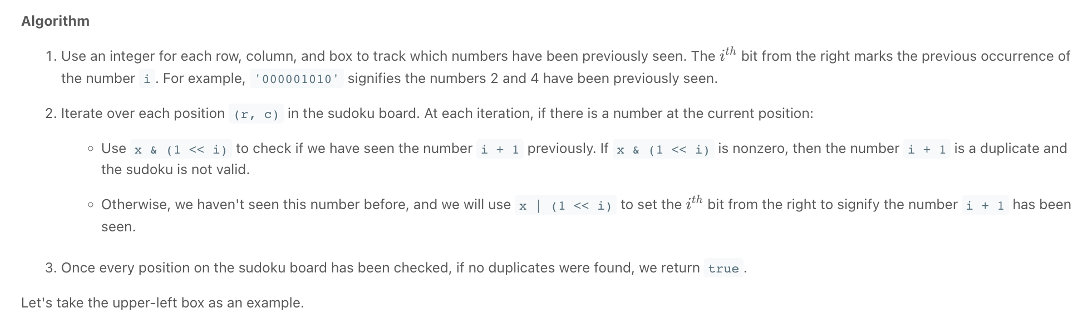

In [ ]:
# Bit masking
# time = O(N^2), space = O(N)
class Solution:
    def isValidSudoku(self, board: List[List[str]]) -> bool:
        N = 9
        # Use binary number to check previous occurrence
        rows = [0] * N
        cols = [0] * N
        boxes = [0] * N

        for r in range(N):
            for c in range(N):
                # Check if the position is filled with number
                if board[r][c] == ".":
                    continue

                pos = int(board[r][c]) - 1

                # Check the row
                if rows[r] & (1 << pos):
                    return False
                rows[r] |= (1 << pos)

                # Check the column
                if cols[c] & (1 << pos):
                    return False
                cols[c] |= (1 << pos)

                # Check the box
                idx = (r // 3) * 3 + c // 3
                if boxes[idx] & (1 << pos):
                    return False
                boxes[idx] |= (1 << pos)

        return True

In [ ]:
# Hash set
# time = O(N^2), space = O(N^2)
class Solution:
    def isValidSudoku(self, board: List[List[str]]) -> bool:
        N = 9

        # Use hash set to record the status
        rows = [set() for _ in range(N)]
        cols = [set() for _ in range(N)]
        boxes = [set() for _ in range(N)]

        for r in range(N):
            for c in range(N):
                val = board[r][c]
                # Check if the position is filled with number
                if val == ".":
                    continue

                # Check the row
                if val in rows[r]:
                    return False
                rows[r].add(val)

                # Check the column
                if val in cols[c]:
                    return False
                cols[c].add(val)

                # Check the box
                idx = (r // 3) * 3 + c // 3
                if val in boxes[idx]:
                    return False
                boxes[idx].add(val)

        return True

In [ ]:
# Array of fixed length
# time = O(N^2), space = O(N^2)
class Solution:
    def isValidSudoku(self, board: List[List[str]]) -> bool:
        N = 9

        # Use an array to record the status
        rows = [[0] * N for _ in range(N)]
        cols = [[0] * N for _ in range(N)]
        boxes = [[0] * N for _ in range(N)]

        for r in range(N):
            for c in range(N):
                # Check if the position is filled with number
                if board[r][c] == ".":
                    continue

                pos = int(board[r][c]) - 1

                # Check the row
                if rows[r][pos] == 1:
                    return False
                rows[r][pos] = 1

                # Check the column
                if cols[c][pos] == 1:
                    return False
                cols[c][pos] = 1

                # Check the box
                idx = (r // 3) * 3 + c // 3
                if boxes[idx][pos] == 1:
                    return False
                boxes[idx][pos] = 1

        return True

## 175. Combine Two Tables
Table: Person
```
+-------------+---------+
| Column Name | Type    |
+-------------+---------+
| personId    | int     |
| lastName    | varchar |
| firstName   | varchar |
+-------------+---------+
```
personId is the primary key column for this table.
This table contains information about the ID of some persons and their first and last names.
 

Table: Address
```
+-------------+---------+
| Column Name | Type    |
+-------------+---------+
| addressId   | int     |
| personId    | int     |
| city        | varchar |
| state       | varchar |
+-------------+---------+
```
addressId is the primary key column for this table.
Each row of this table contains information about the city and state of one person with ID = PersonId.
 

Write an SQL query to report the first name, last name, city, and state of each person in the Person table. If the address of a personId is not present in the Address table, report null instead.

Return the result table in any order.

The query result format is in the following example.

 

Example 1:

Input: 
Person table:
```
+----------+----------+-----------+
| personId | lastName | firstName |
+----------+----------+-----------+
| 1        | Wang     | Allen     |
| 2        | Alice    | Bob       |
+----------+----------+-----------+
Address table:
+-----------+----------+---------------+------------+
| addressId | personId | city          | state      |
+-----------+----------+---------------+------------+
| 1         | 2        | New York City | New York   |
| 2         | 3        | Leetcode      | California |
+-----------+----------+---------------+------------+
Output: 
+-----------+----------+---------------+----------+
| firstName | lastName | city          | state    |
+-----------+----------+---------------+----------+
| Allen     | Wang     | Null          | Null     |
| Bob       | Alice    | New York City | New York |
+-----------+----------+---------------+----------+
```
Explanation: 
There is no address in the address table for the personId = 1 so we return null in their city and state.
addressId = 1 contains information about the address of personId = 2.

In [ ]:
select FirstName, LastName, City, State
from Person left join Address
on Person.PersonId = Address.PersonId

## 178. Rank Scores
Table: Scores
```
+-------------+---------+
| Column Name | Type    |
+-------------+---------+
| id          | int     |
| score       | decimal |
+-------------+---------+
```
id is the primary key for this table.
Each row of this table contains the score of a game. Score is a floating point value with two decimal places.
 
Write an SQL query to rank the scores. The ranking should be calculated according to the following rules:

The scores should be ranked from the highest to the lowest.
If there is a tie between two scores, both should have the same ranking.
After a tie, the next ranking number should be the next consecutive integer value. In other words, there should be no holes between ranks.
Return the result table ordered by score in descending order.

The query result format is in the following example.

Example 1:

Input: 
Scores table:
```
+----+-------+
| id | score |
+----+-------+
| 1  | 3.50  |
| 2  | 3.65  |
| 3  | 4.00  |
| 4  | 3.85  |
| 5  | 4.00  |
| 6  | 3.65  |
+----+-------+
Output: 
+-------+------+
| score | rank |
+-------+------+
| 4.00  | 1    |
| 4.00  | 1    |
| 3.85  | 2    |
| 3.65  | 3    |
| 3.65  | 3    |
| 3.50  | 4    |
+-------+------+
```

In [ ]:
# MySQL (preferred approach)
SELECT
  S1.score,
  (
    SELECT
      COUNT(DISTINCT S2.score)
    FROM
      Scores S2
    WHERE
      S2.score >= S1.score
  ) AS 'rank'
FROM
  Scores S1
ORDER BY
  S1.score DESC;

In [ ]:
# MySQL
SELECT
  S.score,
  COUNT(DISTINCT T.score) AS 'rank'
FROM
  Scores S
  INNER JOIN Scores T ON S.score <= T.score
GROUP BY
  S.id,
  S.score
ORDER BY
  S.score DESC;

## 202. Happy Number
Write an algorithm to determine if a number n is happy.

A happy number is a number defined by the following process:

Starting with any positive integer, replace the number by the sum of the squares of its digits.
Repeat the process until the number equals 1 (where it will stay), or it loops endlessly in a cycle which does not include 1.
Those numbers for which this process ends in 1 are happy.
Return true if n is a happy number, and false if not.

Example 1:  
Input: n = 19  
Output: true  
Explanation:  
1^2 + 9^2 = 82  
8^2 + 2^2 = 68  
6^2 + 8^2 = 100  
1^2 + 0^2 + 0^2 = 1

Example 2:  
Input: n = 2  
Output: false

Constraints:

1 <= n <= 2^31 - 1

In [ ]:
# Detect Cycles with a HashSet
# time = O(243⋅3+logn+loglogn+logloglogn)... = O(logn); space = O(logn)
def isHappy(self, n: int) -> bool:

    def get_next(n):
        total_sum = 0
        while n > 0:
            n, digit = divmod(n, 10)
            total_sum += digit ** 2
        return total_sum

    seen = set()
    while n != 1 and n not in seen:
        seen.add(n)
        n = get_next(n)

    return n == 1

In [ ]:
# Floyd's Cycle-Finding Algorithm
# time = O(logn); space = O(1)
def isHappy(self, n: int) -> bool:  
    def get_next(number):
        total_sum = 0
        while number > 0:
            number, digit = divmod(number, 10)
            total_sum += digit ** 2
        return total_sum

    slow_runner = n
    fast_runner = get_next(n)
    while fast_runner != 1 and slow_runner != fast_runner:
        slow_runner = get_next(slow_runner)
        fast_runner = get_next(get_next(fast_runner))
    return fast_runner == 1

In [ ]:
# Hardcoding the Only Cycle (Advanced)
# time = O(logn); space = O(1)
'''
The previous two approaches are the ones you'd be expected to come up with in an interview.
This third approach is not something you'd write in an interview, but is aimed at the mathematically curious
among you as it's quite interesting.

What's the biggest number that could have a next value bigger than itself?
Well we know it has to be less than 243, from the analysis we did previously. Therefore, we know that 
any cycles must contain numbers smaller than 243, as anything bigger could not be cycled back to. 
With such small numbers, it's not difficult to write a brute force program that finds all the cycles.

If you do this, you'll find there's only one cycle: 4 => 16 => 37 => 58 => 89 => 145 => 42 => 20 => 4.
All other numbers are on chains that lead into this cycle, or on chains that lead into 1.

Therefore, we can just hardcode a HashSet containing these numbers, and if we ever reach one of them,
then we know we're in the cycle. There's no need to keep track of where we've been previously.
'''
def isHappy(self, n: int) -> bool:

    cycle_members = {4, 16, 37, 58, 89, 145, 42, 20}

    def get_next(number):
        total_sum = 0
        while number > 0:
            number, digit = divmod(number, 10)
            total_sum += digit ** 2
        return total_sum

    while n != 1 and n not in cycle_members:
        n = get_next(n)

    return n == 1

## 412. Fizz Buzz
Given an integer n, return a string array answer (1-indexed) where:

answer[i] == "FizzBuzz" if i is divisible by 3 and 5.
answer[i] == "Fizz" if i is divisible by 3.
answer[i] == "Buzz" if i is divisible by 5.
answer[i] == i (as a string) if none of the above conditions are true.

Example 1:
Input: n = 3
Output: ["1","2","Fizz"]

Example 2:
Input: n = 5
Output: ["1","2","Fizz","4","Buzz"]

Example 3:
Input: n = 15
Output: ["1","2","Fizz","4","Buzz","Fizz","7","8","Fizz","Buzz","11","Fizz","13","14","FizzBuzz"]

Constraints:

1 <= n <= 10^4

In [ ]:
# Naive
# time = O(N), space = O(1)
class Solution:
    def fizzBuzz(self, n: int) -> List[str]:
        # ans list
        ans = []

        for num in range(1,n+1):

            divisible_by_3 = (num % 3 == 0)
            divisible_by_5 = (num % 5 == 0)

            if divisible_by_3 and divisible_by_5:
                # Divides by both 3 and 5, add FizzBuzz
                ans.append("FizzBuzz")
            elif divisible_by_3:
                # Divides by 3, add Fizz
                ans.append("Fizz")
            elif divisible_by_5:
                # Divides by 5, add Buzz
                ans.append("Buzz")
            else:
                # Not divisible by 3 or 5, add the number
                ans.append(str(num))

        return ans

In [ ]:
# str concat
# time = O(N), space = O(1)
class Solution:
    def fizzBuzz(self, n: int) -> List[str]:
        # ans list
        ans = []

        for num in range(1,n+1):

            divisible_by_3 = (num % 3 == 0)
            divisible_by_5 = (num % 5 == 0)

            num_ans_str = ""

            if divisible_by_3:
                # Divides by 3
                num_ans_str += "Fizz"
            if divisible_by_5:
                # Divides by 5
                num_ans_str += "Buzz"
            if not num_ans_str:
                # Not divisible by 3 or 5
                num_ans_str = str(num)

            # Append the current answer str to the ans list
            ans.append(num_ans_str)  

        return ans

In [ ]:
# hashing
# time = O(N), space = O(1)
class Solution:
    def fizzBuzz(self, n: int) -> List[str]:
        # ans list
        ans = []

        # Dictionary to store all fizzbuzz mappings
        fizz_buzz_dict = {3 : "Fizz", 5 : "Buzz"}
        
        # List of divisors which we will iterate over.
        divisors = [3, 5]

        for num in range(1, n + 1):

            num_ans_str = []

            for key in divisors:
                # If the num is divisible by key,
                # then add the corresponding string mapping to current num_ans_str
                if num % key == 0:
                    num_ans_str.append(fizz_buzz_dict[key])

            if not num_ans_str:
                num_ans_str.append(str(num))

            # Append the current answer str to the ans list
            ans.append(''.join(num_ans_str))

        return ans